# This is a program to read the list of companies in India and plot their 2016 revenue ranked by largest first 

In [120]:
# import necessary libraries

import numpy as np
import pandas as pd

from urllib.request import urlopen
from bs4 import BeautifulSoup

# defining function to read html content from the web page - passed as 'link'

def getHtmlContent(link):
    html = urlopen (link)
    soup = BeautifulSoup(html,'html.parser')
    return soup

content = getHtmlContent('https://en.wikipedia.org/wiki/List_of_companies_of_India')

# get all tables and assign first table to variable 'tables'

tables = content.find_all('table')[0]

#creating a table to capture the parsed version of HTML table for further analysis

new_table = pd.DataFrame(columns=range(0,6),index=range(0,10))

row_marker = 0
rows = tables.find_all('tr')
for row in rows:
    column_marker = 0
    cells = row.find_all('td')
    for column in cells:
        new_table.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    row_marker +=1
new_table

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,137\n,\n,Indian Oil Corporation\n,"$65,916\n","34,999\n",Indian Oil provides products and services all ...
2,148\n,\n,Reliance Industries\n,"$62,304\n","187,729\n",Reliance Industries is a true conglomerate wit...
3,197\n,\n,Oil and Natural Gas Corporation\n,"$51,219\n","33,560\n",\n
4,216\n,\n,State Bank of India\n,"$47,551\n","278,872\n","The bank is a state-owned, multi-national fina..."
5,232\n,\n,Tata Motors\n,"$45,842\n","79,558\n",Tata Motors is a multinational automobile desi...
6,314\n,\n,Bharat Petroleum\n,"$36,851\n","12,567\n",\n
7,405\n,\n,Rajesh Exports\n,"$29,125\n",328\n,"Gold manufacturing, exporting, and retailing c..."
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


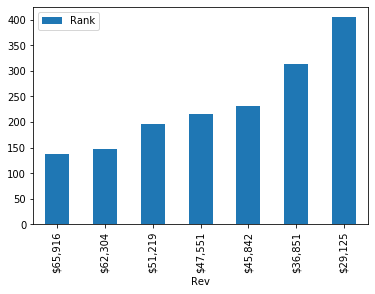

In [179]:
# import necessary libraries

import numpy as np
import pandas as pd

from urllib.request import urlopen
from bs4 import BeautifulSoup

# defining function to read html content from the web page - passed as 'link'

def getHtmlContent(link):
    html = urlopen (link)
    soup = BeautifulSoup(html,'lxml')
    return soup

content = getHtmlContent('https://en.wikipedia.org/wiki/List_of_companies_of_India')

# get all tables and assign first table to variable 'tables'

tables = content.find_all('table')[0]

#creating a table to capture the parsed version of HTML table for further analysis

new_table = pd.DataFrame(columns=['Rank','IMage','Name','Rev','emp','notes'],index=range(0,10))

# range(0,6)

row_marker = 0
rows = tables.find_all('tr')
for row in rows:
    column_marker = 0
    cells = row.find_all('td')
    for column in cells:
        new_table.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    row_marker +=1

new_table =new_table.replace('\n','', regex=True)   #remove newline characters
new_table =new_table.dropna()                       #remove empty values 
    
new_table["Rank"]= new_table["Rank"].astype(int)    #change data type to integer 
new_table.plot.bar(x='Rev',y='Rank',linestyle='--') 